In [1]:
cd drive/My\ Drive/SGL

/content/drive/My Drive/SGL


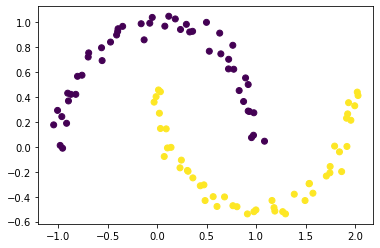

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from learn_graph_topology import learn_k_component_graph

np.random.seed(0)
n = 50  # number of nodes per cluster
k = 2   # number of components
X, y = make_moons(n_samples=n*k, noise=.05, shuffle=True)
# dict to store position of nodes
pos = {}
for i in range(n*k):
    pos[i] = X[i]
# Visualization of original data
plt.scatter(X[:,0], X[:,1], c=y )
plt.show()
# X, y = make_blobs(n_samples=n*k, centers=k, n_features=2, random_state=0)

# compute sample correlation matrix
S = np.dot(X, X.T)

In [49]:
# estimate underlying graph
graph = learn_k_component_graph(S, k=2, maxiter=1000, record_objective = True, beta=0.1, record_weights = True)

100%|██████████| 1000/1000 [01:11<00:00, 13.90it/s]


In [50]:
NLL = graph['negloglike']
print('NLL: ', min(NLL))
OBJ = graph['obj_fun']
print('Objective: ', min(OBJ))

NLL:  -293.6124507152397
Objective:  -291.0120066081841


In [51]:
# build network
A = graph['adjacency']
G = nx.from_numpy_matrix(A)
# Graph statistics
print('Nodes: ', G.number_of_nodes(), 'Edges: ', G.number_of_edges() )

Nodes:  100 Edges:  410


In [52]:
# normalize edge weights to plot nice graph
all_weights = []
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight'])
max_weight = max(all_weights)
norm_weights = [3* w / max_weight for w in all_weights]
norm_weights = norm_weights
print(norm_weights)

[0.6233652215437648, 0.7221160620837426, 1.761083753411345, 2.236589606786694, 1.9639772887063311, 1.4043606381126301, 2.3741740688531268, 0.5145262005928586, 1.1378179778756166, 1.3991658781812855, 1.1411581145072802, 1.0924107033041164, 1.0059268361819886, 2.0923142690468084, 2.2285002246639016, 2.243891529881854, 1.5382109418213241, 0.43760646865081326, 2.548496500498023, 1.686300801420684, 1.4779766541729675, 2.7179111907124534, 2.0320767422669834, 1.298819348157703, 0.2129896273648642, 2.2748137994196704, 1.2023332078847702, 0.4073359920812679, 0.8609676440434277, 1.7037414649178204, 1.5591602110330127, 2.1991553856959687, 0.5193917061865503, 1.055183875155193, 1.5472595341200692, 0.12183020730771188, 2.336496648175952, 1.4201991373819076, 1.5210882100823242, 1.4884625839303836, 2.191157338660754, 1.3563782040934087, 1.2834548172122275, 0.5942181249616233, 0.7595599277955853, 1.9718587585847414, 1.0372414562772234, 2.2146696559586565, 1.8377804766986927, 0.975056600891695, 1.16308

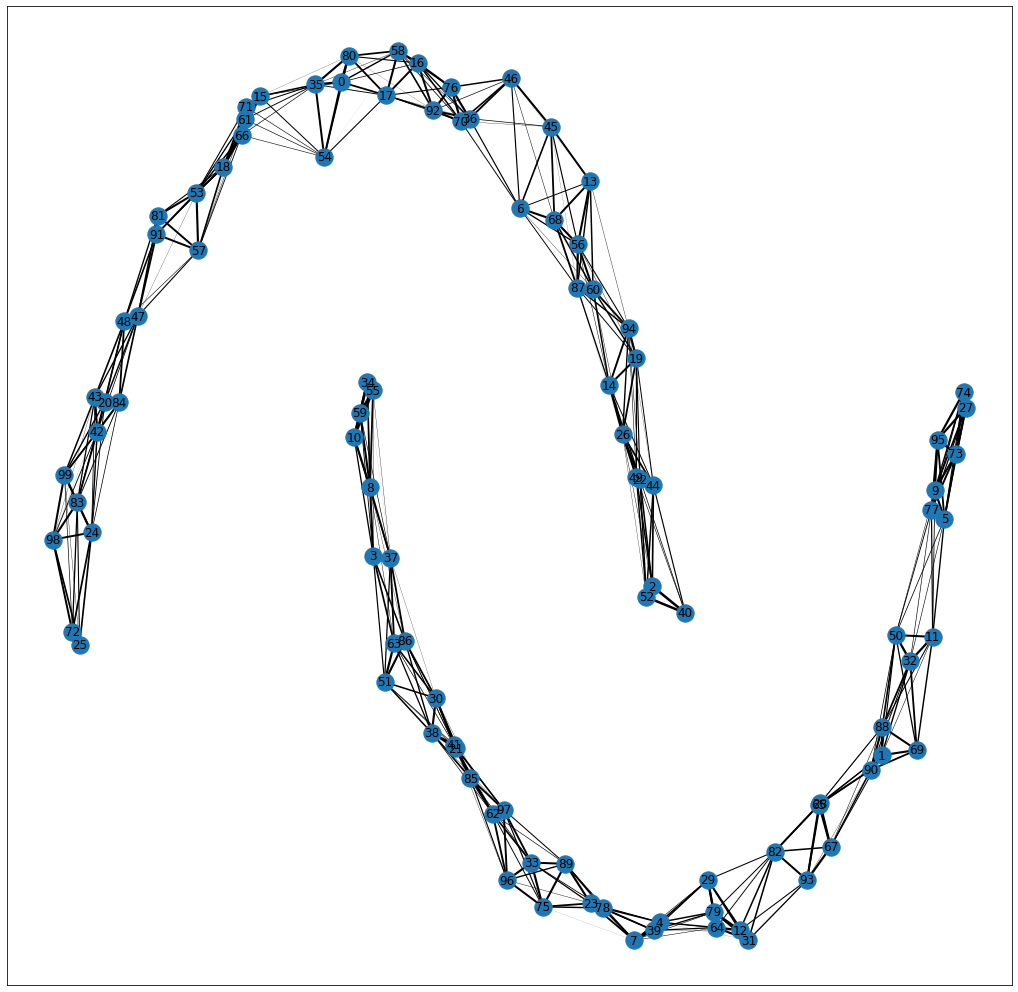

In [53]:
plt.figure(1,figsize=(18,18)) 
nx.draw_networkx(G,pos, width=norm_weights)
plt.show()